# Intro
This notebook is an example-driven tutorial on how to use the script `split_notebook.py`. At the top of `split_notebook.py`, there is precise documentation on the script's behavior; however, this example-driven tutorial is probably easier to follow.


## Purpose of the script
In the past, the education team has maintained separate "release" and "solution" versions of each assignment. With `split_notebook.py`, the education team can maintain a single master notebook for each assignment, and then run `split_notebook.py` on the master notebook to create release and solution versions.

The master version should never be published publically; it's only for internal use.

The release and solution version should never be edited directly; instead, edit the master version.

## Running the command

Open up a terminal. Navigate to the folder containing this tutorial. Then run the following command:

`python3 split_notebook.py fa2020 'Notebook Splitter Tutorial.ipynb' .`

(We'll go over what those arguments mean later.)

You'll see two new files in the current directory: `Notebook Splitter Tutorial-RELEASE.ipynb` and `Notebook Splitter Tutorial-SOLUTION.ipynb`. We just treated this file as a master file, creating release and solution versions. 

As we go through the following examples, I suggest you compare this master file with the release and solution files you just created.

## Control Tags

In the master file, add "control tags" to specify what should go in release vs. solution. Control tags start with the double pound sign "##". There are three types of control tags:

1. Solution tags (e.g. `## SOLUTION`)
2. Release tags (e.g. `## RELEASE`)
3. Output tags (e.g. `## CLEAR OUTPUT`)

# Excluding Cells

Solution and release tags at the top of a cell specify that the cell should only be in one version.

This only works if the solution/release tag is the ONLY text on the first line of a cell.

Note: Don't put a blank line after the control tag -- this will result in a cell in release/solution that starts with a blank line, which is ugly.

In [37]:
## RELEASE
# this cell will only be in the release version

version = "RELEASE"

In [38]:
## SOLUTION
# this cell will only be in the solution version

version = "SOLUTION"

In [ ]:
# this cell will be in both versions

print("This file is the " + version + " version.")

# Excluding Lines
Solution and release tags can also be added at the end of lines to omit just those lines, rather than the whole cell.

If a line is commented out but given a release tag, it will be uncommented in release. Same for lines with solution tags. (This is useful for seeing what your release and solution notebooks will look like. You can comment out all of the solution lines in a section to see what the release looks like, or vice versa. That same strategy can also be used to obtain the desired cell outputs, as cell outputs are copied into the release and solution.)

In [22]:
print("hello world")
print("release") ## RELEASE
print("solution") ## SOLUTION

hello world
release
solution


In [23]:
print("Here's a fun shape.")
# print("This is a downwards-facing triangle.") ## RELEASE
# print("This is an upwards-facing triangle.") ## SOLUTION


print("-----------------") ## RELEASE
print("\               /") ## RELEASE
print(" \             / ") ## RELEASE
print("  \           /  ") ## RELEASE
print("   \         /   ") ## RELEASE
print("    \       /    ") ## RELEASE
print("        .        ")       ## SOLUTION
print("       / \       ")       ## SOLUTION
print("      /   \      ")       ## SOLUTION
print("     /     \     ")       ## SOLUTION
print("     \     /     ") ## RELEASE
print("      \   /      ") ## RELEASE
print("       \ /       ") ## RELEASE
print("        .        ") ## RELEASE
print("    /       \    ")       ## SOLUTION
print("   /         \   ")       ## SOLUTION
print("  /           \  ")       ## SOLUTION
print(" /             \ ")       ## SOLUTION
print("/               \\")      ## SOLUTION
print("-----------------")       ## SOLUTION

Here's a fun shape.
-----------------
\               /
 \             / 
  \           /  
   \         /   
    \       /    
        .        
       / \       
      /   \      
     /     \     
     \     /     
      \   /      
       \ /       
        .        
    /       \    
   /         \   
  /           \  
 /             \ 
/               \
-----------------


In [24]:
x = 1 # We can also include comments, but make sure comments come before control tags ## SOLUTION

In [27]:
# Here's a messy detail: What if we want a comment that's on its own line to appear only in release?

# This gets uncommented in release, so it's parsed as code and not a comment :( ## RELEASE

## Using a double pound sign here gives us what we want! ## RELEASE 

### Here are some practical examples, written like problems given to students:

In [26]:
lst = [1,9,9,8]

sum_of_lst = 0
for i in lst:
    # Add a line here to save the sum of the list elements seen so far
    sum_of_lst += i ## SOLUTION
print("sum:", sum_of_lst)

sum: 27


In [ ]:
lst_length = 0 # Replace this line ## RELEASE
# lst_length = len(lst) ## SOLUTION

## The following line throws an error, since we're dividing by 0. Replace the line above to fix it! ## RELEASE
print("average:", sum_of_lst / lst_length)

# Clear Output

The output tag is omits the output of a cell from the release version. The output remains in the solution version. "Output" in jupyter notebooks are the things appear underneath a code cell, including print statements, error messages, and graphs.

The output tag must be the last line of a cell.

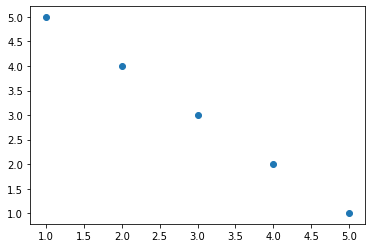

In [32]:
# Example: Describe the relationship between x and y by making a scatterplot of x and y.
from matplotlib import pyplot as plt
x = [1,3,5,4,2]
y = [5,3,1,2,4]

## Make a scatterplot here ## RELEASE

## We want the following plot to be in the solution, but we don't want it in release. ## SOLUTION
plt.scatter(x,y)
## CLEAR OUTPUT

You'll probably find yourself taking the following steps ofte:
1. Comment out the release lines. 
2. Add an output tag at the bottom of the cell.
3. Run the cell (where only solution code will run, since release code is commented out)
4. Run the script.

# Markdown

## SOLUTION

This cell appears in only in solution, with "## SOLUTION" being rendered as a markdown header.

##SOLUTION 

We wrote "##SOLUTION" at the top of this cell, with no space between the pound signs and "SOLUTION". This cell is only in solution. 

# Command line arguments

This is the general form of the command:

`python3 split_notebook.py <watermark> <path to master notebook> <path to folder where release and solution versions should go>`

Alternatively, you can put add an extra argument if you want release and solution versions in different places:

`python3 split_notebook.py <watermark> <path to master notebook> <path to folder where RELEASE should go> <path to folder where SOLUTION should go>.`

For the "watermark", put something like "fa2020" or "fa2020 a1". The script adds a metadata field, "notebookId", in the release and solution .ipynb files, set to a value that is a hash of the supplied watermark. This can't be seen when opening the notebook; it can only be seen by looking at the raw text encoding of the notebook. This is useful for distinguishing between notebook versions in different semesters. If necessary, it could be used to make sure a student didn't't submit a file from a different semester.

There's one last option, added just for completeness:

`python3 split_notebook.py <watermark> <path to master notebook> <path to folder where RELEASE should go> <path to folder where SOLUTION should go> maintainMarkdown.`

The additional `maintainMarkdown` option makes it so that in markdown cells, "##SOLUTION" is a control tag but "## SOLUTION" is not (notice the whitespace). This allows you to make a subheader in a markdown cell that says "solution".

My suggestion: dont use the `maintainMarkdown` argument. Instead, if you want a subheader that says "solution", write `<h2>solution</h2>`

# Additional Details on Control Tags

In [6]:
##release

print("This cell is only in the release version, since control tags are case insensitive")

This cell is only in the release version, since control tags are case insensitive


In [36]:
## SOLUTION oops

print("This cell will only be in the solution version, and 'oops' is removed")

This cell will only be in the solution version, and 'oops' is removed


In [9]:
print("ignores whitespace 1") ##release
print("ignores whitespace 2") ##      release

ignores whitespace 1
ignores whitespace 2


In [34]:
print("ignores whitespace 3") 
##clearoutput

ignores whitespace 3


In [35]:
print("ignores whitespace 4")
## clear    output   

ignores whitespace 4



To be safe, always use `ctrl+/` to comment out lines of code with control tags, instead of manually adding "#" at the beginning of the line. Manually adding "#" can cause the script to mess up indentation.